In [127]:
options(warn=-1)



In [128]:

library(Peptides)

# a function returning per residue average hydrophobicity for a group of sequences of varying length as well as the number of sequences counted at each position
# seqs: a list of sequences
# L_max: take the last L_max residues for very long sequences
# L_min: only consider sequences at least L_min aa long.
# if a sequence is shorter than L_max, fill the beginning with 'x', which will not be used for calculating average hydrophobicity at that position
avg_hydrophobicity_per_position <-function(seqs,L_max,L_min,hydrophobicity_scale){
  H <- rep(0,L_max) # hydrophobicity at each position
  N <- rep(0,L_max) # count of sequence at each position
  i=0
  for(seq in seqs){
    # print progress for every 1000
    i=i+1
    if (i%%1000==0) {
      print(i)
    }
    
    if(nchar(seq) >= L_min){
      seq = paste(paste(rep('x',L_max),collapse=''),seq,sep='')
      seq = substr(seq,nchar(seq)-L_max+1,nchar(seq))
      hi = hydrophobicity(unlist(strsplit(seq,'')),hydrophobicity_scale) 
      H = H + hi 
      N = as.numeric(N) + as.numeric(hi!=0)
    }
  }
  H = H/N
  return(list(H,N))
}

# same as above but look at N-term
avg_hydrophobicity_per_position_nterm <-function(seqs,L_max,L_min,hydrophobicity_scale){
  H <- rep(0,L_max) # hydrophobicity at each position
  N <- rep(0,L_max) # count of sequence at each position
  i=0
  for(seq in seqs){
    # print progress for every 1000
    i=i+1
    if (i%%1000==0) {
      print(i)
    }
    
    if(nchar(seq) >= L_min){
      seq = paste(seq,paste(rep('x',L_max),collapse=''),sep='') # changed
      seq = substr(seq,1,L_max) # changed
      hi = hydrophobicity(unlist(strsplit(seq,'')),hydrophobicity_scale) 
      H = H + hi 
      N = as.numeric(N) + as.numeric(hi!=0)
    }
  }
  H = H/N
  return(list(H,N))
}



In [132]:
# full protein
p=read.table('protein.txt')

# linker
d=read.table('linkers.txt')

# unfolded Cterm
f=read.table('unfolded_cterm.txt')

L_max=100
L_min=100
hydrophobicity_scale = 'Miyazawa' 

CDS_N = avg_hydrophobicity_per_position_nterm(p$V1,L_max,L_min,hydrophobicity_scale)
CDS_C = avg_hydrophobicity_per_position(p$V1,L_max,L_min,hydrophobicity_scale)
unfold_C = avg_hydrophobicity_per_position(f$V1,L_max,L_min,hydrophobicity_scale)

[1] 1000
[1] 2000
[1] 3000
[1] 4000
[1] 5000
[1] 6000
[1] 7000
[1] 8000
[1] 9000
[1] 10000
[1] 11000
[1] 12000
[1] 13000
[1] 14000
[1] 15000
[1] 16000
[1] 17000
[1] 18000
[1] 19000
[1] 20000
[1] 21000
[1] 22000
[1] 23000
[1] 24000
[1] 25000
[1] 26000
[1] 27000
[1] 28000
[1] 29000
[1] 30000
[1] 31000
[1] 32000
[1] 33000
[1] 34000
[1] 35000
[1] 36000
[1] 37000
[1] 38000
[1] 39000
[1] 1000
[1] 2000
[1] 3000
[1] 4000
[1] 5000
[1] 6000
[1] 7000
[1] 8000
[1] 9000
[1] 10000
[1] 11000
[1] 12000
[1] 13000
[1] 14000
[1] 15000
[1] 16000
[1] 17000
[1] 18000
[1] 19000
[1] 20000
[1] 21000
[1] 22000
[1] 23000
[1] 24000
[1] 25000
[1] 26000
[1] 27000
[1] 28000
[1] 29000
[1] 30000
[1] 31000
[1] 32000
[1] 33000
[1] 34000
[1] 35000
[1] 36000
[1] 37000
[1] 38000
[1] 39000
[1] 1000
[1] 2000
[1] 3000
[1] 4000
[1] 5000
[1] 6000
[1] 7000
[1] 8000
[1] 9000
[1] 10000
[1] 11000
[1] 12000
[1] 13000
[1] 14000


null device 
          1

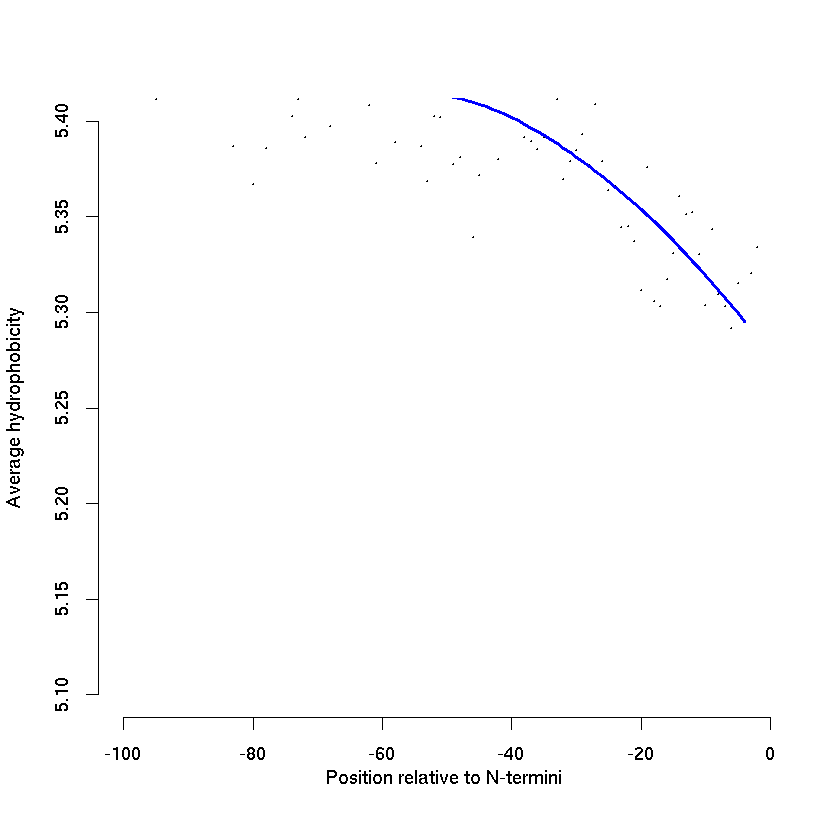

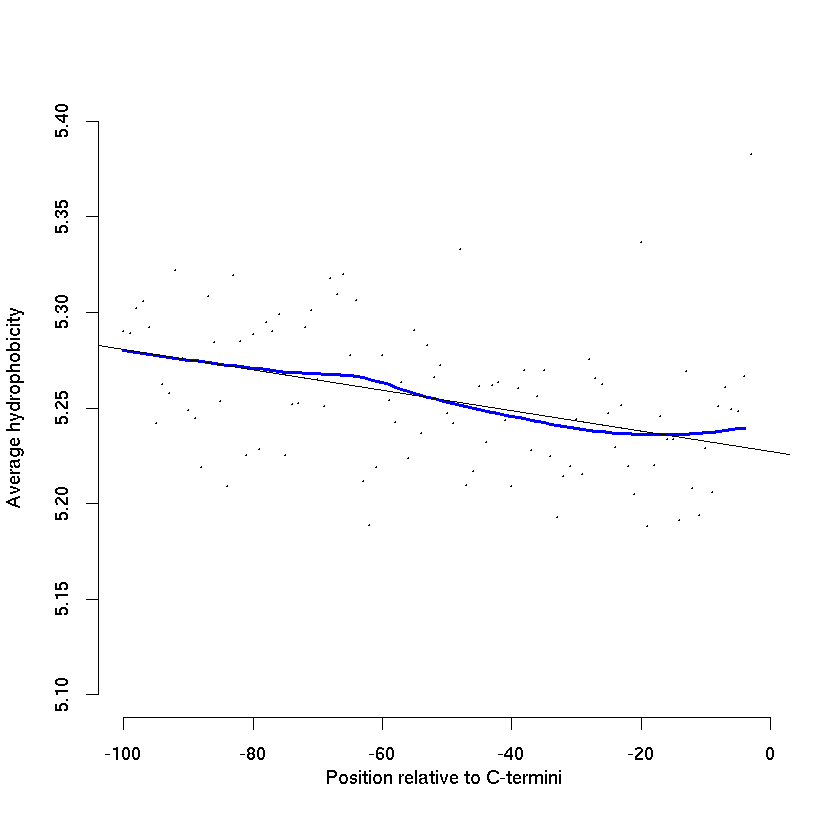

In [135]:

if (hydrophobicity_scale == 'Miyazawa'){
  ylim=c(5.1,5.4)
} else if (hydrophobicity_scale == 'Ponnuswamy'){
  ylim=c(0.35,0.65)
}
L=100
skip_last=3

dev.off()
#pdf(paste('N-C-term-',hydrophobicity_scale,'.pdf',sep=''),width=6,height=4)

x=-L:-1

y=CDS_C[[1]][(L_max-L+1):L_max]
lo <- loess(y[1:(L-skip_last)]~x[1:(L-skip_last)])
plot(x,y,ylim=ylim,pch=16,cex=0.2,col='black',bty='n',ylab='\nAverage hydrophobicity',xlab='Position relative to N-termini\n')
lines(x, predict(lo,x), col='blue', lwd=2)


y=unfold_C[[1]][(L_max-L+1):L_max]
lo <- loess(y[1:(L-skip_last)]~x[1:(L-skip_last)])
plot(x,y,ylim=ylim,pch=16,cex=0.2,col='black',bty='n',ylab='\nAverage hydrophobicity',xlab='Position relative to C-termini\n')
lines(x, predict(lo,x), col='blue', lwd=2)
abline(lm(y[1:(L-skip_last)]~x[1:(L-skip_last)]))

[1] -0.4256917


	Spearman's rank correlation rho

data:  y[1:(L - skip_last)] and x[1:(L - skip_last)]
S = 216842, p-value = 1.671e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.4256917 


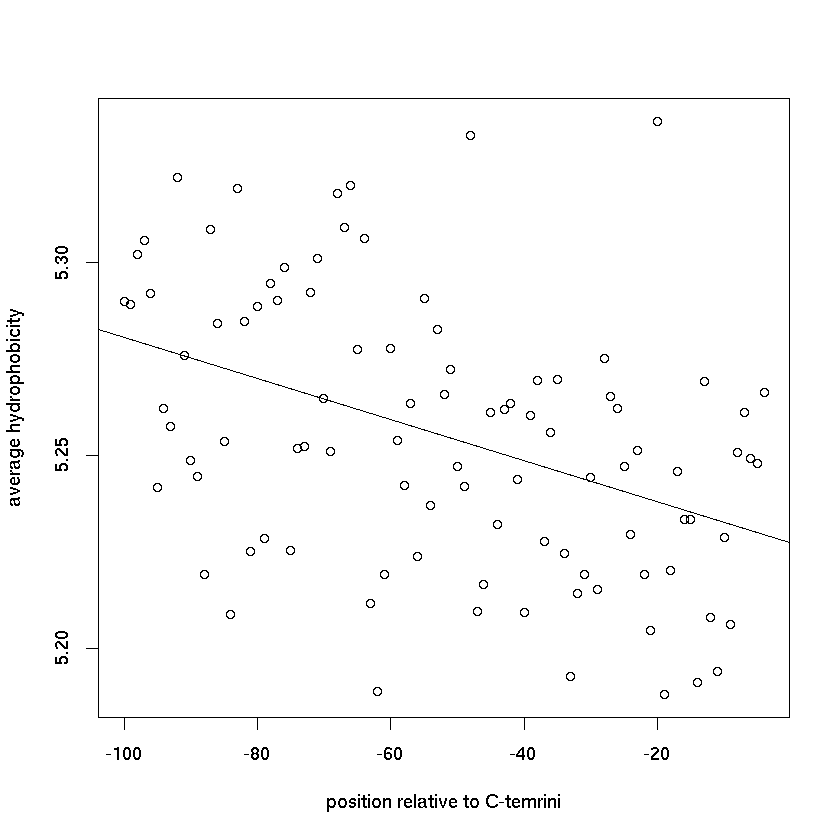

In [149]:
plot(x[1:(L-skip_last)],y[1:(L-skip_last)],xlab='position relative to C-temrini',ylab='average hydrophobicity')
abline(lm(y[1:(L-skip_last)]~x[1:(L-skip_last)]))
cor(y[1:(L-skip_last)],x[1:(L-skip_last)],method='s')
cor.test(y[1:(L-skip_last)],x[1:(L-skip_last)],method='s')


NULL